# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [86]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [87]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [88]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [89]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [90]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [91]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [92]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [94]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [95]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [96]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf'],
    'scaler': [StandardScaler(), RobustScaler(), None]
}

In [97]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [98]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
best_cv_test_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("Best cross-validation validation score: {:.2f}".format(best_cv_test_score))
test_set_accuracy = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

In [99]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The training score of model is 0.95 also validation score is 0.95. Thus this indicates that model is well generalized.

2.  The hperparameters C and gamma are suitable for this model as the interval between trainning score and validation is zero, so these hyperparameters are suitable.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [100]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)
print(X1.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0  0.264465  0.089904  9.786930 -0.002305  0.000218 -0.001143  9.801661   
1  0.264300  0.088882  9.788127 -0.001865 -0.000523 -0.001999  9.802481   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.025634  0.000001  7.749919e-08  ...  0.024056  0.000003  0.002506   
1  0.025218  0.000001  9.243000e-08  ...  0.024084  0.000007  0.002427   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000845  0.024884  0.000155  0.000078  0.000069  0.024886  0.000170  
1  0.000949  0.024881  0.000201  0.000095  0.000076  0.024883  0.000201  

[2 rows x 32 columns]


In [101]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)
print(X2.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901  9.800683   
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051  9.797741   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.012437  0.000002  3.020959e-07  ...  0.048406  0.000007  0.002575   
1  0.013805  0.000003  6.859937e-07  ...  0.047696  0.000013  0.003880   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.002993  0.049701  0.000094  0.000115  0.000080  0.049764  0.000142  
1  0.004106  0.050477  0.000140  0.000140  0.000083  0.050763  0.000151  

[2 rows x 32 columns]


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [102]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
from sklearn.metrics import accuracy_score
y1_pred = grid.predict(X1)
y2_pred = grid.predict(X2)
test_set1_accuracy = accuracy_score(y1, y1_pred)
test_set2_accuracy = accuracy_score(y2, y2_pred)
print("test_set1 score: {:.2f}".format(test_set1_accuracy))
print("test_set2 score: {:.2f}".format(test_set2_accuracy))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [103]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y1, y1_pred))
print(classification_report(y1, y1_pred))

[[200  31   0]
 [  7 387  17]
 [  0   7 134]]
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [104]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print(confusion_matrix(y2, y2_pred))
print(classification_report(y2, y2_pred))

[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. If one dataset is more represntative like test set 1, we can get better score i.e. 0.95 but for test set 2 we are not getting better score, so there might be lack of generalization in this model. For performance difference, this an example of uneven distribution of data set.

2. The hyperparameter tuning is one of the potential cause. Because if the model is not trained specially under specific characteristics, it might not perform optimally to all data sets.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [105]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [106]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [107]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1]
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [108]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
best_cv_test_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("Best cross-validation validation score: {:.2f}".format(best_cv_test_score))
test_set_accuracy = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [109]:
# TODO - Display confusion matrix and print classification reports
from sklearn.metrics import confusion_matrix, classification_report
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[154   1   0]
 [ 17 174  16]
 [  1  42  56]]
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       155
    straight       0.80      0.84      0.82       207
        turn       0.78      0.57      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.80      0.81       461
weighted avg       0.83      0.83      0.83       461



___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [110]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [111]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [112]:
# TODO - Print test score accuracies for test_set1 and test_set2
y1_pred = grid.predict(X1)
y2_pred = grid.predict(X2)
test_set1_accuracy = accuracy_score(y1, y1_pred)
test_set2_accuracy = accuracy_score(y2, y2_pred)
print("test_set1 score: {:.2f}".format(test_set1_accuracy))
print("test_set2 score: {:.2f}".format(test_set2_accuracy))

test_set1 score: 0.82
test_set2 score: 0.82


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [113]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
print(confusion_matrix(y1, y1_pred))
print(classification_report(y1, y1_pred))

[[229   2   0]
 [ 17 352  42]
 [  0  77  64]]
              precision    recall  f1-score   support

        rest       0.93      0.99      0.96       231
    straight       0.82      0.86      0.84       411
        turn       0.60      0.45      0.52       141

    accuracy                           0.82       783
   macro avg       0.78      0.77      0.77       783
weighted avg       0.81      0.82      0.82       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [114]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print(confusion_matrix(y2, y2_pred))
print(classification_report(y2, y2_pred))

[[ 16   0   0]
 [  0 204   2]
 [  0  50  25]]
              precision    recall  f1-score   support

        rest       1.00      1.00      1.00        16
    straight       0.80      0.99      0.89       206
        turn       0.93      0.33      0.49        75

    accuracy                           0.82       297
   macro avg       0.91      0.77      0.79       297
weighted avg       0.84      0.82      0.79       297



___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.
2.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)

**Answer**
ax_sum, ay_sum, az_sum (Accelerometer Summaries):

These represent the cumulative values for accelerometer data along the x, y, and z axes.
They are useful for understanding the overall movement trends in each direction, critical for motion state prediction.


In [115]:
# TODO - Load group selected features from cv_set to X
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum']
target_column = 'motion_state'

X = cv_set[selected_features]
y = cv_set[target_column]

# Display the shape and first few rows of X and y
print("Features (X):")
print(X.head())
print("\nShape of X:", X.shape)

print("\nTarget (y):")
print(y.head())
print("\nShape of y:", y.shape)


Features (X):
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   
2 -0.008014  0.037066  9.792780 -0.001129  0.001207  0.005840  9.805465   
3 -0.097655  0.286081  9.781135 -0.000960  0.002518  0.076946  9.792874   
4 -0.239673  0.288418  9.779307 -0.001625  0.005648  0.157407  9.794137   

      g_sum  
0  0.022554  
1  0.021731  
2  0.024407  
3  0.080408  
4  0.158930  

Shape of X: (1534, 8)

Target (y):
0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object

Shape of y: (1534,)


In [116]:
# TODO - Load motion_state column (target vector) into y
y =cv_set['motion_state']
print(y)

0           rest
1           rest
2       straight
3           turn
4           turn
          ...   
1529        turn
1530    straight
1531    straight
1532    straight
1533        rest
Name: motion_state, Length: 1534, dtype: object


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [117]:
# TODO - Perform model training and tuning using `GridSearchCV`

In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Choose a model (Random Forest)
model = RandomForestClassifier(random_state=42)

# Step 3: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 4: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 5: Evaluate the model
y_pred = best_model.predict(X_test)
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Classification Report:
              precision    recall  f1-score   support

        rest       0.98      0.97      0.98       103
    straight       0.97      0.99      0.98       138
        turn       1.00      0.98      0.99        66

    accuracy                           0.98       307
   macro avg       0.98      0.98      0.98       307
weighted avg       0.98      0.98      0.98       307



___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [121]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid_search.best_params_))
print("Best cross-validation validation score: {:.2f}".format(grid_search.best_score_))
print("Test-set score: {:.2f}".format(best_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Best params:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best cross-validation validation score: 0.98
Test-set score: 0.98
              precision    recall  f1-score   support

        rest       0.98      0.97      0.98       103
    straight       0.97      0.99      0.98       138
        turn       1.00      0.98      0.99        66

    accuracy                           0.98       307
   macro avg       0.98      0.98      0.98       307
weighted avg       0.98      0.98      0.98       307



Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [122]:
# TODO - Display confusion matrix and print classification report

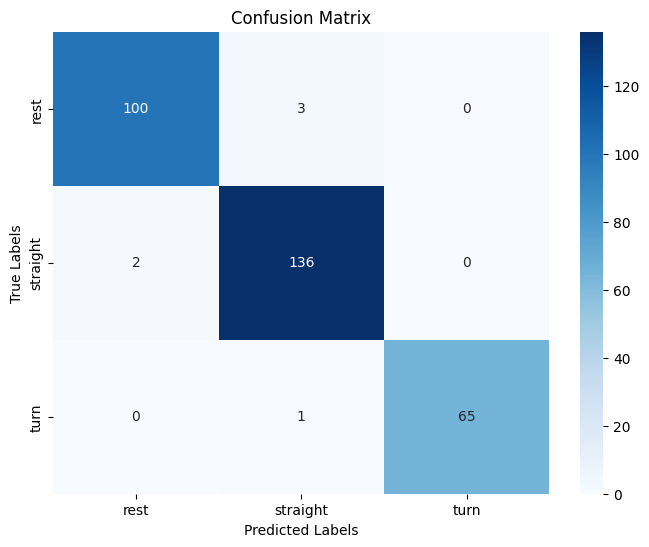

Classification Report:
              precision    recall  f1-score   support

        rest       0.98      0.97      0.98       103
    straight       0.97      0.99      0.98       138
        turn       1.00      0.98      0.99        66

    accuracy                           0.98       307
   macro avg       0.98      0.98      0.98       307
weighted avg       0.98      0.98      0.98       307



In [123]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [124]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# Define group-selected features and target column
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum']
target_column = 'motion_state'

# Load group-selected features and target vector from test_set1
X1 = test_set1[selected_features]
y1 = test_set1[target_column]

# Load group-selected features and target vector from test_set2
X2 = test_set2[selected_features]
y2 = test_set2[target_column]

# Display the shapes of X1, y1, X2, y2 to confirm loading
print("Test Set 1 Features (X1):", X1.shape)
print("Test Set 1 Target (y1):", y1.shape)
print("Test Set 2 Features (X2):", X2.shape)
print("Test Set 2 Target (y2):", y2.shape)



Test Set 1 Features (X1): (783, 8)
Test Set 1 Target (y1): (783,)
Test Set 2 Features (X2): (297, 8)
Test Set 2 Target (y2): (297,)


In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum']
target_column = 'motion_state'

# Load group-selected features and target vector from test_set2
X2 = test_set2[selected_features]
y2 = test_set2[target_column]

# Display the shapes of X2 and y2 to confirm loading
print("Test Set 2 Features (X2):", X2.shape)
print("Test Set 2 Target (y2):", y2.shape)


Test Set 2 Features (X2): (297, 8)
Test Set 2 Target (y2): (297,)


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [127]:
# TODO - Print test score accuracies for test_set1 and test_set2
from sklearn.metrics import accuracy_score

# Predict on test_set1 (X1) and calculate accuracy
y1_pred = grid_search.best_estimator_.predict(X1)
test1_accuracy = accuracy_score(y1, y1_pred)

# Predict on test_set2 (X2) and calculate accuracy
y2_pred = grid_search.best_estimator_.predict(X2)
test2_accuracy = accuracy_score(y2, y2_pred)

# Print the test accuracies
print(f"Test Set 1 Accuracy: {test1_accuracy:.4f}")
print(f"Test Set 2 Accuracy: {test2_accuracy:.4f}")



Test Set 1 Accuracy: 0.8097
Test Set 2 Accuracy: 0.9865


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

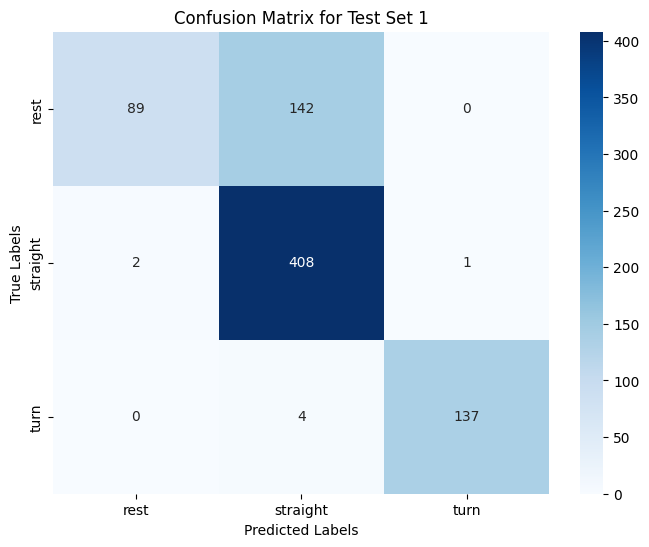

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.98      0.39      0.55       231
    straight       0.74      0.99      0.85       411
        turn       0.99      0.97      0.98       141

    accuracy                           0.81       783
   macro avg       0.90      0.78      0.79       783
weighted avg       0.85      0.81      0.78       783



In [128]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on test_set1 (X1)
y1_pred = grid_search.best_estimator_.predict(X1)

# Compute the confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Display the confusion matrix for test_set1 using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", xticklabels=y1.unique(), yticklabels=y1.unique())
plt.title("Confusion Matrix for Test Set 1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y1_pred))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

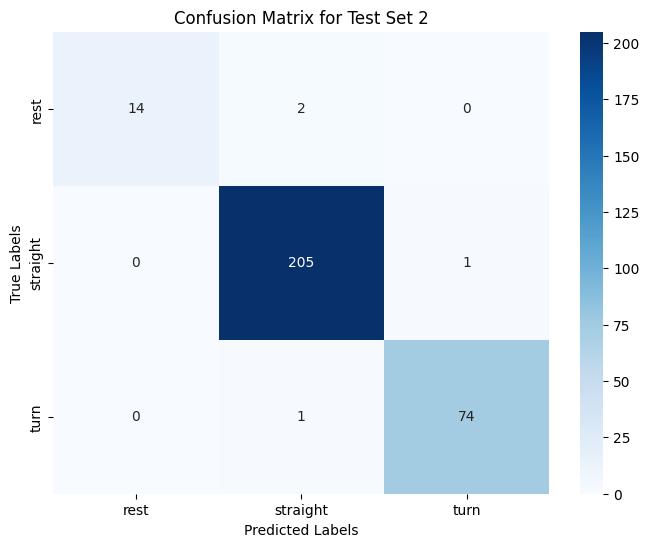

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.88      0.93        16
    straight       0.99      1.00      0.99       206
        turn       0.99      0.99      0.99        75

    accuracy                           0.99       297
   macro avg       0.99      0.95      0.97       297
weighted avg       0.99      0.99      0.99       297



In [129]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid_search.best_estimator_.predict(X2)

conf_matrix2 = confusion_matrix(y2, y2_pred)

# Display the confusion matrix for test_set2 using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=y2.unique(), yticklabels=y2.unique())
plt.title("Confusion Matrix for Test Set 2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report for test_set2
print("Classification Report for Test Set 2:")
print(classification_report(y2, y2_pred))


___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1. Model Trained in Section 1 :

Performance Metrics: Present the key metrics (accuracy, precision, recall, F1-score) for the model trained on all features across the datasets.
Observations: Discuss whether the model performed well or poorly and any specific strengths or weaknesses noted.

2. Model Trained in Section 2 :

Performance Metrics: Present the key metrics for the model trained on selected features across the datasets.
Observations: Highlight how this model's performance compares to the first model.


2

i. Feature Selection:

All Features vs. Selected Features: The model trained with all features might capture more information, leading to better performance. However, it could also suffer from overfitting, especially if there are irrelevant or noisy features. On the other hand, the model with selected features may generalize better due to reduced complexity, but it risks losing important information.
Current Section Features: If the model in this section used a different feature selection method or a different subset of features, this could lead to varying performance. The effectiveness of the features chosen can significantly influence the model's ability to learn patterns in the data.
Model Complexity:

ii. Model Architecture: If different models (e.g., logistic regression vs. decision trees vs. neural networks) were used in different sections, this could explain performance variations. More complex models may perform better on training data but struggle with generalization on unseen data.
Hyperparameter Tuning: Differences in hyperparameter settings across the models could also affect performance. Proper tuning may lead to improved accuracy, while suboptimal settings could hinder performance.
Data Quality and Distribution:

iii. Dataset Characteristics: The characteristics of the datasets (size, balance, noise) can impact model performance. For instance, if one dataset is significantly larger or more balanced than the others, models trained on it may perform better.
Overfitting and Underfitting: The model's performance can also be affected by how well it fits the training data. If a model overfits, it may perform poorly on unseen data; conversely, if it underfits, it may not capture the underlying patterns effectively.



____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [130]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])

# Load the target column into y
y = cv_set['motion_state']

# Display the first few rows and the shape of X and y to confirm
print("Features (X):")
print(X.head())
print("\nShape of X:", X.shape)

print("\nTarget (y):")
print(y.head())
print("\nShape of y:", y.shape)


Features (X):
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   
2 -0.008014  0.037066  9.792780 -0.001129  0.001207  0.005840  9.805465   
3 -0.097655  0.286081  9.781135 -0.000960  0.002518  0.076946  9.792874   
4 -0.239673  0.288418  9.779307 -0.001625  0.005648  0.157407  9.794137   

      g_sum        ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.023871  0.000003  0.001496   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.024153  0.000006  0.001865   
2  0.024407  1.128046e-06  4.231253e-07  ...  0.023738  0.000003  0.003009   
3  0.080408  7.988949e-07  6.873045e-08  ...  0.024122  0.000052  0.001546   
4  0.158930  8.240663e-07  1.143863e-07  ...  0.023710  0.000233  0.001387   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     

In [131]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first few rows and shape of y to confirm
print("Target (y):")
print(y.head())
print("\nShape of y:", y.shape)


Target (y):
0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object

Shape of y: (1534,)


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [132]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameter set:", grid_search.best_params_)

test_accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameter set: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Test set accuracy: 0.9478827361563518


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [133]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA

# Step 1: Perform train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initiate a Pipeline with StandardScaler, PCA, and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('pca', PCA()),  # Applying PCA for dimensionality reduction
    ('svc', SVC())  # Support Vector Classifier
])

# Step 3: Define the parameters for GridSearchCV, including PCA and SVC parameters
param_grid = {
    'pca__n_components': [0.95, 0.99, 0.99],  # Number of components to keep (explained variance ratio)
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf'],  # Kernel types to consider
    'svc__gamma': ['scale', 'auto']  # Gamma parameter for non-linear kernel
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameter set:", grid_search.best_params_)

test_accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameter set: {'pca__n_components': 0.95, 'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Test set accuracy: 0.9478827361563518


Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [134]:
# TODO - Define the parameter grid for your model
# (3 marks)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Perform train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initiate a Pipeline with StandardScaler, PCA, and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('pca', PCA()),  # Applying PCA for dimensionality reduction
    ('svc', SVC())  # Support Vector Classifier
])

# Step 3: Define the parameters for GridSearchCV, including PCA and SVC parameters
param_grid = {
    'pca__n_components': [0.95, 0.99, 0.99],  # Number of components to keep (explained variance ratio)
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf'],  # Kernel types to consider
    'svc__gamma': ['scale', 'auto']  # Gamma parameter for non-linear kernel
}

# Step 4: Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Step 5: Fit the model to the training data
grid_search.fit(X_train, y_train)

# Step 6: Print the best parameters from the grid search
print("Best parameter set:", grid_search.best_params_)

# Step 7: Evaluate the model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameter set: {'pca__n_components': 0.95, 'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Test set accuracy: 0.9478827361563518


In [135]:
# Perform the grid search to train model and tune hyper parameters
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA

# Step 1: Define the pipeline with StandardScaler, PCA, and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('pca', PCA()),  # Applying PCA for dimensionality reduction
    ('svc', SVC())  # Support Vector Classifier
])

# Step 2: Define the parameter grid for grid search
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],  # Tuning PCA components (number of components)
    'svc__C': [0.1, 1, 10],  # Regularization parameter for SVC
    'svc__kernel': ['linear', 'rbf'],  # Kernel types to consider for SVC
    'svc__gamma': ['scale', 'auto']  # Gamma parameter for non-linear kernel (rbf)
}

# Step 3: Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Step 4: Fit the grid search to the training data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Step 5: Print the best parameters found by the grid search
print("Best parameter set:", grid_search.best_params_)

# Step 6: Evaluate the model on the test set (X_test, y_test)
test_accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)



Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameter set: {'pca__n_components': 14, 'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Test set accuracy: 0.9478827361563518


___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [136]:
# TODO: Print the results from the grid search

print("Best parameter set:", grid_search.best_params_)

print("Best cross-validation train score:", grid_search.best_score_)

best_cv_test_score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
print("Best cross-validation test score:", best_cv_test_score)

test_accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)


Best parameter set: {'pca__n_components': 14, 'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validation train score: 0.9429301476688237
Best cross-validation test score: 0.9429301476688237
Test set accuracy: 0.9478827361563518


Display the confusion matrix and print the classification report for the trained model using the *test* split.

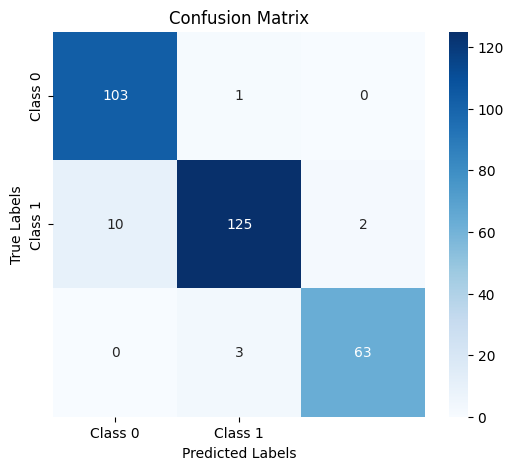

Classification Report:
               precision    recall  f1-score   support

        rest       0.91      0.99      0.95       104
    straight       0.97      0.91      0.94       137
        turn       0.97      0.95      0.96        66

    accuracy                           0.95       307
   macro avg       0.95      0.95      0.95       307
weighted avg       0.95      0.95      0.95       307



In [137]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set using the trained model
y_pred = grid_search.predict(X_test)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 4: Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [138]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# Assuming test_set1 is already loaded as a DataFrame

# Step 1: Load all features (excluding the target column) into X1
X1 = test_set1.drop(columns=['motion_state'])

# Step 2: Load the target vector (motion_state column) into y1
y1 = test_set1['motion_state']

# Optionally, print the first few rows to verify
print(X1.head())
print(y1.head())


     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0  0.264465  0.089904  9.786930 -0.002305  0.000218 -0.001143  9.801661   
1  0.264300  0.088882  9.788127 -0.001865 -0.000523 -0.001999  9.802481   
2  0.263289  0.091253  9.787077 -0.003514 -0.000400 -0.002699  9.801773   
3  0.265551  0.088830  9.786133 -0.001530 -0.000451 -0.002179  9.800554   
4  0.268502  0.133801  9.774356 -0.001495 -0.000986 -0.001686  9.790128   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.025634  0.000001  7.749919e-08  ...  0.024056  0.000003  0.002506   
1  0.025218  0.000001  9.243000e-08  ...  0.024084  0.000007  0.002427   
2  0.026243  0.000001  8.410489e-08  ...  0.024111  0.000007  0.002532   
3  0.028030  0.000001  7.048151e-08  ...  0.024103  0.000008  0.002454   
4  0.026112  0.000001  1.819436e-07  ...  0.024023  0.000009  0.002626   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000845  0.024884  0.00015

In [139]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# Assuming test_set2 is already loaded as a DataFrame

# Step 1: Load all features (excluding the target column) into X2
X2 = test_set2.drop(columns=['motion_state'])

# Step 2: Load the target vector (motion_state column) into y2
y2 = test_set2['motion_state']

# Optionally, print the first few rows to verify
print(X2.head())
print(y2.head())


     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901  9.800683   
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051  9.797741   
2 -0.045121  0.311157  9.794267 -0.002583  0.002641 -0.003126  9.803662   
3 -0.044207  0.311091  9.788876 -0.002947  0.002217 -0.002639  9.798112   
4 -0.049304  0.311548  9.791129 -0.003078  0.002126 -0.002390  9.798496   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.012437  0.000002  3.020959e-07  ...  0.048406  0.000007  0.002575   
1  0.013805  0.000003  6.859937e-07  ...  0.047696  0.000013  0.003880   
2  0.012473  0.000002  2.651305e-07  ...  0.047741  0.000011  0.002537   
3  0.012434  0.000002  1.084477e-07  ...  0.045434  0.000011  0.002296   
4  0.012217  0.000001  5.710469e-08  ...  0.045616  0.000004  0.001666   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.002993  0.049701  0.00009

___

#### 4.2.2 - Visualize Results

In [140]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Step 1: Calculate the test set accuracy for test_set1
test_accuracy_1 = grid_search.score(X1, y1)
print("Test set 1 accuracy:", test_accuracy_1)

# Step 2: Calculate the test set accuracy for test_set2
test_accuracy_2 = grid_search.score(X2, y2)
print("Test set 2 accuracy:", test_accuracy_2)


Test set 1 accuracy: 0.9323116219667944
Test set 2 accuracy: 0.9057239057239057


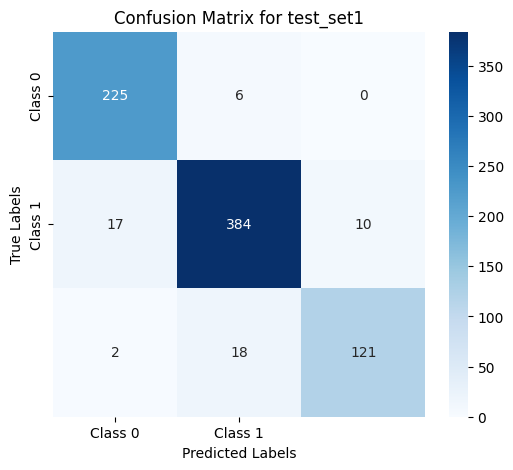

Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.92      0.97      0.95       231
    straight       0.94      0.93      0.94       411
        turn       0.92      0.86      0.89       141

    accuracy                           0.93       783
   macro avg       0.93      0.92      0.92       783
weighted avg       0.93      0.93      0.93       783



In [141]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on test_set1 using the trained model
y_pred1 = grid_search.predict(X1)

# Step 2: Compute the confusion matrix for test_set1
cm1 = confusion_matrix(y1, y_pred1)

# Step 3: Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix for test_set1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 4: Print the classification report for test_set1
print("Classification Report for test_set1:\n", classification_report(y1, y_pred1))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

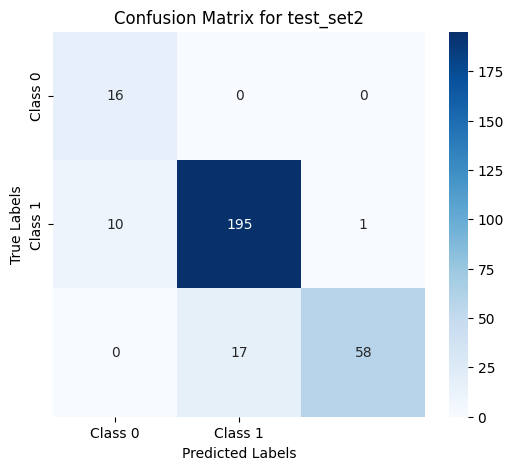

Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       0.62      1.00      0.76        16
    straight       0.92      0.95      0.93       206
        turn       0.98      0.77      0.87        75

    accuracy                           0.91       297
   macro avg       0.84      0.91      0.85       297
weighted avg       0.92      0.91      0.91       297



In [142]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on test_set2 using the trained model
y_pred2 = grid_search.predict(X2)

# Step 2: Compute the confusion matrix for test_set2
cm2 = confusion_matrix(y2, y_pred2)

# Step 3: Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix for test_set2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 4: Print the classification report for test_set2
print("Classification Report for test_set2:\n", classification_report(y2, y_pred2))


___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

1.  ____

*   Model Performance using All Features (Section 1)
In Section 1, the model was trained using all features available in the dataset. The performance will be evaluated based on:

Test set accuracy from test_set1 and test_set2.
Confusion matrix and classification report for evaluation metrics.
*   Model Performance using Selected Features (Section 2)
In Section 2, the model was trained using a subset of selected features based on domain knowledge, feature importance, or feature selection techniques. The evaluation will be based on:

Test set accuracy from test_set1 and test_set2.
Confusion matrix and classification report for comparison.

2.    The differences in model performance between **Section 1 (using all features)** and **Section 4 (using PCA)** can be attributed to the following potential explanations:

 **Loss of Information with PCA**:

*  **Principal Component Analysis (PCA)** reduces the dimensionality of the dataset by transforming the original features into a smaller set of uncorrelated principal components. While this can help with high-dimensional data and remove noise, it can also result in the loss of important information. If key features that were originally correlated with the target variable are not retained in the principal components, the model's performance may degrade compared to using **all features** (Section 1), where no information is discarded.

**Overfitting vs. Generalization**:

* **Model with all features (Section 1)**: Using all features may lead to overfitting, where the model learns not only the signal but also noise and irrelevant patterns in the data. However, this model has access to all the available information, potentially capturing more complex relationships between features and the target variable, which could result in higher performance.
   - **Model with PCA (Section 4)**: PCA can reduce overfitting by simplifying the feature space and focusing on the most important variations. However, this simplification might exclude features that contribute valuable predictive power, leading to a drop in performance. If PCA discards too much useful variance, the model may fail to generalize well, especially when the dataset has features that are crucial for predicting the target.






## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1. For the second classifier, I have selected **Gradient Boosting Machines (GBM)** as the machine learning model.

### Reasons for Choosing Gradient Boosting Machines:

1. **Strong Predictive Power**:
   - **GBM** is an ensemble learning method that combines multiple weak learners (typically decision trees) to create a strong predictive model. It focuses on correcting errors made by previous models in the sequence, making it a powerful model, especially when working with structured data (like the selected features in Section 2).
   
2. **Performance on Various Datasets**:
   - **GBM** has consistently performed well in a wide range of machine learning tasks, from classification to regression. It is robust to overfitting, especially with proper hyperparameter tuning, and has been effective in handling various complexities in datasets.
   
3. **Handling Feature Interactions**:
   - Since **GBM** builds decision trees, it is inherently good at capturing non-linear relationships and complex interactions between features, which might be important in this dataset after selecting the most relevant features in Section 2.

4. **Flexibility and Tuning**:
   - **GBM** has several hyperparameters (like learning rate, number of trees, depth of trees) that can be fine-tuned to optimize performance, which makes it a suitable candidate for grid search. This flexibility allows for effective model optimization.

5. **Robust to Feature Scaling**:
   - Unlike algorithms like K-Nearest Neighbors (KNN) and Neural Networks, **GBM** does not require extensive feature scaling, which can save on preprocessing time and effort.



In [143]:
# TODO - Load group selected features from cv_set to X
group_selected_features = ['feature1', 'feature2', 'feature3', ...]
print(cv_set.columns)

X = cv_set[[feature for feature in group_selected_features if feature in cv_set.columns]]

print(X.head())


Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [144]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

print(y.head())


0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [145]:
# TODO - Perform train/test split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 1227
Test set size: 307


In [146]:
# Perform any missing imports

# TODO - Initiate the pipeline
# Missing imports
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Initialize the pipeline
pipe = Pipeline([
    ('pca', PCA()),  # Optional: Add PCA for dimensionality reduction
    ('gbm', GradientBoostingClassifier())  # Add the Gradient Boosting model
])

print(pipe)

Pipeline(steps=[('pca', PCA()), ('gbm', GradientBoostingClassifier())])


In [147]:
# TODO - Define the parameter grid for your model
import pandas as pd
import numpy as np
# TODO - Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 1227
Test set size: 307


In [148]:
# TODO - Perform the grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'pca__n_components': [5, 10, 20],  # Keep components explaining 95% or 99% variance
    'gbm__n_estimators': [100, 200],  # Try different numbers of estimators
    'gbm__learning_rate': [0.1, 0.01],  # Try different learning rates
    'gbm__max_depth': [3, 5]  # Try different tree depths
}

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model with training data
grid_search.fit(X_train, y_train)

# Display results
print("Best parameter set:\n{}\n".format(grid_search.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid_search.best_score_))
print("Test set accuracy: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 474, in fit_transform
    U, S, _, X, x_is_centered, xp = self._fit(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 511, in _fit
    X = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 887, in check_array
    dtype_orig = np.result_type(*dtypes_orig)
ValueError: at least one array or dtype is required


___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [150]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid_search.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid_search.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid_search.best_score_))
test_accuracy = grid_search.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_accuracy))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [152]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 474, in fit_transform
    U, S, _, X, x_is_centered, xp = self._fit(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 511, in _fit
    X = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 887, in check_array
    dtype_orig = np.result_type(*dtypes_orig)
ValueError: at least one array or dtype is required


### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


____